# 图像分类

In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-rc0


## 获取Fashion MNIST数据集

本指南使用 Fashion MNIST 数据集，该数据集包含 10 个类别中的 70,000 个灰度图像。 图像显示了低分辨率（28 x 28像素）的单件服装

Fashion MNIST 旨在替代经典的MNIST数据集，通常用作计算机视觉机器学习计划的 “Hello，World”

我们将使用 60,000 张图像来训练网络和 10,000 张图像，以评估网络学习图像分类的准确程度

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

图像是28x28 NumPy数组，像素值介于0到255之间。标签是一个整数数组，范围从0到9.这些对应于图像所代表的服装类别：

|Label|Class|
|:-:|:-:|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|oat|
|5|andal|
|6|hirt|
|7|neaker|
|8|ag|
|9|nkle boot|

每个图像都映射到一个标签。 由于类名不包含在数据集中，因此将它们存储在此处以便在绘制图像时使用

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 探索数据

让我们在训练模型之前探索数据集的格式。 以下显示训练集中有60,000个图像，每个图像表示为28 x 28像素

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## 处理数据

图片展示

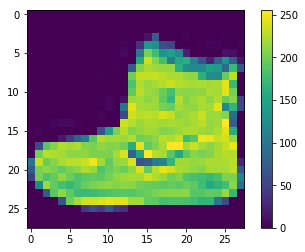

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

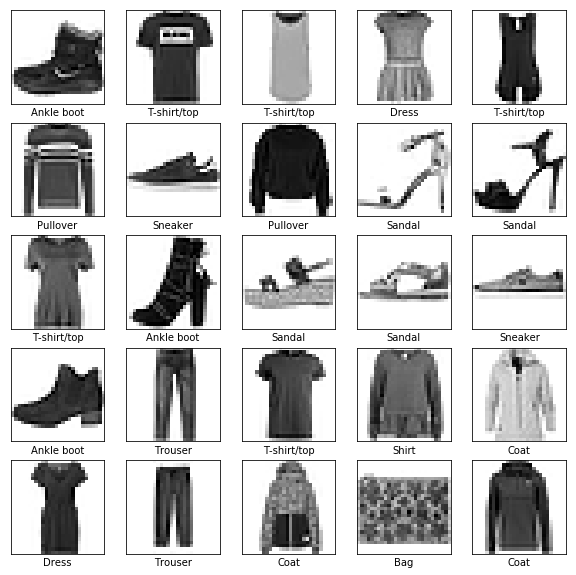

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构造网络

In [7]:
model = keras.Sequential([
    layers.Flatten(input_shape=[28, 28]),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## 训练与验证

In [9]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 56us/sample - loss: 0.4975 - accuracy: 0.8269s - loss: 0.5089 - ac
Epoch 2/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3767 - accuracy: 0.8645
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3368 - accuracy: 0.8782s - loss: 0.3 - ETA: 0s - loss: 0.3402 
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3126 - accuracy: 0.8845
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2950 - accuracy: 0.8915


In [10]:
model.evaluate(test_images, test_labels)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3500068996667862, 0.8719]

## 预测

In [11]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[6.6942243e-06 4.6987541e-08 1.9532404e-08 2.8246055e-07 1.6010111e-06
 5.5004674e-04 5.2696100e-07 7.9557016e-02 3.5372450e-05 9.1984838e-01]
9
9


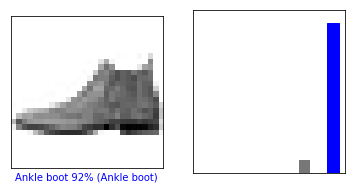

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
    
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

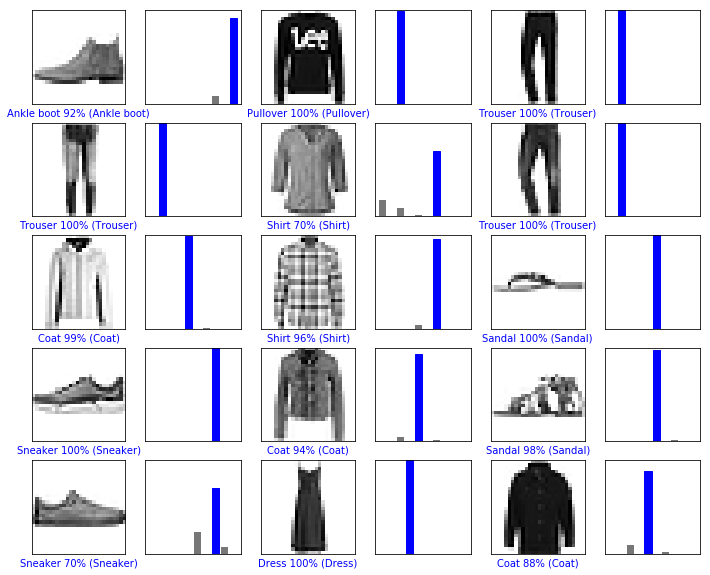

In [15]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

(1, 28, 28)
[[6.6942312e-06 4.6987541e-08 1.9532404e-08 2.8246188e-07 1.6010127e-06
  5.5004726e-04 5.2696197e-07 7.9557009e-02 3.5372483e-05 9.1984838e-01]]


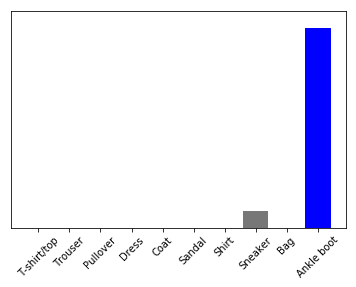

In [16]:
img = test_images[0]

img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)